In [8]:
import numpy as np
import math
import sys
import time
import random
import matplotlib.pyplot as plt

class SAnnealing(object):
    """
    Simulated Annealing algorithm implementation for the Knapsack Problem.

    Args:
        step (int): Step size for temperature updates.
        final_temperature (float): Final temperature threshold for termination.
        temperature (float): Initial temperature.
        alpha (float): Cooling factor for temperature updates.
        equilibrium (int): Number of iterations at each temperature level.
        time (float): Time delay for visualization purposes.
        pesos (list): List of weights of items.
        valores (list): List of values of items.
        capacity (int): Capacity constraint of the knapsack.
        total (float): Total execution time of the algorithm.
        valor_optimo (float): Optimal value achieved by the algorithm.

    """

    def __init__(self, step=1, final_temperature=0.1, temperature=100, alpha=0.95, equilibrium=10, time=0,
                 pesos=[], valores=[], capacity=1, total=0, valor_optimo=0):
        self.step = step
        self.temperature = temperature
        self.final_temperature = final_temperature
        self.alpha = alpha
        self.equilibrium = equilibrium
        self.time = time
        self.pesos = pesos
        self.valores = valores
        self.capacity = capacity
        self.total = total
        self.valor_optimo = valor_optimo

    def cost_function(self, f, x):
        """
        Evaluate the cost function for a given solution.

        Args:
            f (function): Objective function.
            x (list): Solution to evaluate.

        Returns:
            float: Cost value of the solution.
        """
        return f(self.valores, x)

    def getTotalPeso(self, pesos: list, actual_solution: list) -> float:
        """
        Calculate the total weight of a solution.

        Args:
            pesos (list): List of weights of items.
            actual_solution (list): Current solution.

        Returns:
            float: Total weight of the solution.
        """
        totalPeso = 0
        i = 0
        for element in actual_solution:
            if (element):
                totalPeso += pesos[i]
            i += 1
        return totalPeso

    def create_first_solution(self) -> list:
        """
        Generate the initial solution randomly.

        Returns:
            list: Initial solution.
        """
        while (1):
            firstSolution = []
            for i in np.arange(len(self.pesos)):
                firstSolution.append(random.randint(0, 1))
            if (self.getTotalPeso(self.pesos, firstSolution) <= self.capacity):
                return firstSolution

    def create_neighbor_solution(self, actual_solution: list) -> list:
        """
        Generate a neighbor solution by flipping a random bit.

        Args:
            actual_solution (list): Current solution.

        Returns:
            list: Neighbor solution.
        """
        while (1):
            neighbor = actual_solution.copy()
            randomIndex = random.randint(0, (len(actual_solution) - 1))
            neighbor[randomIndex] = 0 if neighbor[randomIndex] == 1 else 1
            if (self.getTotalPeso(self.pesos, neighbor) <= self.capacity):
                return neighbor

    def aceptance_probability(self, deltaE, temperature):
        """
        Calculate the acceptance probability based on energy difference and temperature.

        Args:
            deltaE (float): Energy difference between solutions.
            temperature (float): Current temperature.

        Returns:
            float: Acceptance probability.
        """
        try:
            r = math.exp(-deltaE / temperature)
        except OverflowError:
            r = float("inf")
        return r

    def update_temperature(self, temperature):
        """
        Update the temperature using the cooling schedule.

        Args:
            temperature (float): Current temperature.

        Returns:
            float: Updated temperature.
        """
        return self.alpha * temperature

    def fit(self, objetive):
        """
        Run the Simulated Annealing algorithm.

        Args:
            objetive (function): Objective function to optimize.

        """
        self.cost_ = []
        actual_solution = self.create_first_solution()
        best_solution = actual_solution.copy()
        epoch = 0
        number_tested_solution = 0
        aceptanced = 100
        inicio = time.time()
        while (self.temperature > self.final_temperature):

            number_worst_solution_acepted = 0
            i = 0
            while (i < self.equilibrium):
                random_solution = self.create_neighbor_solution(actual_solution)
                number_tested_solution += 1
                delta_E = self.cost_function(objetive, random_solution) - self.cost_function(objetive, actual_solution)
                if delta_E > 0:
                    actual_solution = random_solution.copy()
                else:
                    deg_deltaE = self.aceptance_probability(-delta_E, self.temperature)
                    if (np.random.uniform(0, 1) < deg_deltaE):
                        actual_solution = random_solution.copy()
                        number_worst_solution_acepted += 1
                x = self.cost_function(objetive, actual_solution)
                self.cost_.append((x, self.temperature))
                epoch_strlen = len(str(epoch))
                fin = time.time()
                self.total = fin - inicio
                sys.stderr.write('\r%0*d Epoch | Equilibrium %d | Temperature %.2f '
                                 '| Cost function: %.2f | Aceptance : %.2f | Time: %.2f'
                                 %
                                 (epoch_strlen, epoch + 1, i + 1, self.temperature,
                                  x, aceptanced, self.total))
                time.sleep(self.time)
                sys.stderr.flush()
                i += 1
                epoch += 1
            self.valor_optimo = x
            aceptanced = number_worst_solution_acepted * 100 / number_tested_solution
            self.temperature = self.update_temperature(self.temperature)
        print(actual_solution)


In [9]:
def formatear_tiempo(tiempo):
    """Función para formatear el tiempo en un formato legible."""
    tiempo_formateado = str(datetime.timedelta(seconds=tiempo))
    return tiempo_formateado

In [10]:
exp_time = []
exp_value = []

In [11]:
# read file
pesos = []
with open('./instancias/p20.txt', 'r') as file:
    for line in file:
        row = line.strip().split(',')
        pesos.append(row)
pesos = np.array(pesos).astype("float")

valores = []
with open('./instancias/v20.txt', 'r') as file:
    for line in file:
        row = line.strip().split(',')
        valores.append(row)
valores = np.array(valores).astype("float")

capacidad = 50

def getTotalValor(valores: list, actual_solution: list) -> float:
    totalValor = 0
    i = 0
    for element in actual_solution:
        if(element):
            totalValor += float(valores[i])
        i += 1
    return totalValor

/tmp/ipykernel_6575/1309072182.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  totalValor += float(valores[i])
6210 Epoch | Equilibrium 30 | Temperature 0.01 | Cost function: 142.00 | Aceptance : 0.00 | Time: 5.0541

[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1]


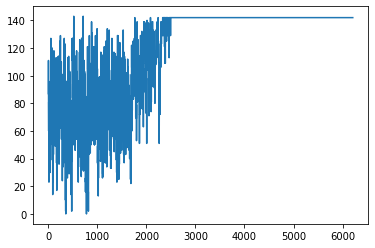

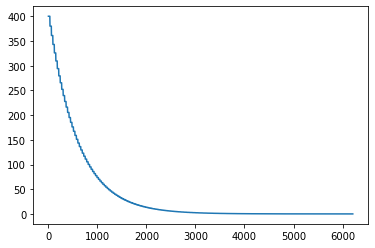

In [12]:
# Experimento1 - prueba 1
sa = SAnnealing(step = 1, final_temperature=0.01, temperature = 400, alpha=0.95, equilibrium=30, time = 0, pesos=pesos, valores=valores, capacity=capacidad)
sa.fit(getTotalValor)
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()
exp_time.append(sa.total)
exp_value.append(sa.valor_optimo)

/tmp/ipykernel_6575/1309072182.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  totalValor += float(valores[i])
6210 Epoch | Equilibrium 30 | Temperature 0.01 | Cost function: 143.00 | Aceptance : 0.00 | Time: 5.0460

[0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]


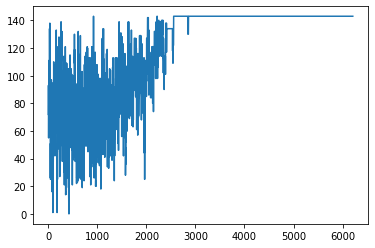

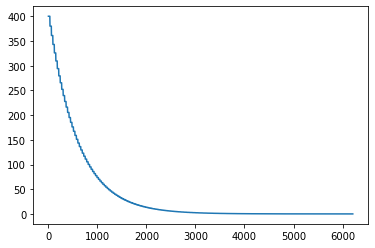

In [13]:
# Experimento1 - prueba 2
sa = SAnnealing(step = 1, final_temperature=0.01, temperature = 400, alpha=0.95, equilibrium=30, time = 0, pesos=pesos, valores=valores, capacity=capacidad)
sa.fit(getTotalValor)
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()
exp_time.append(sa.total)
exp_value.append(sa.valor_optimo)

/tmp/ipykernel_6575/1309072182.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  totalValor += float(valores[i])
6210 Epoch | Equilibrium 30 | Temperature 0.01 | Cost function: 133.00 | Aceptance : 0.00 | Time: 5.0220

[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]


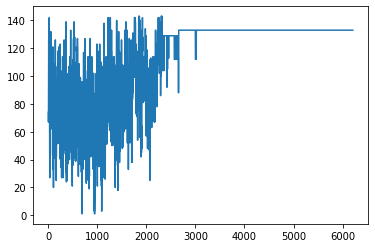

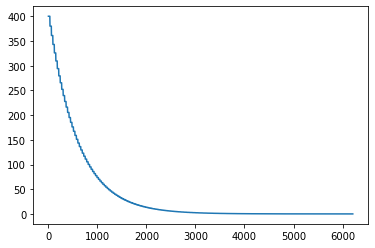

In [14]:
# Experimento1 - prueba 3
sa = SAnnealing(step = 1, final_temperature=0.01, temperature = 400, alpha=0.95, equilibrium=30, time = 0, pesos=pesos, valores=valores, capacity=capacidad)
sa.fit(getTotalValor)
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()
exp_time.append(sa.total)
exp_value.append(sa.valor_optimo)

In [15]:
# Experimento1 - prueba 4
sa = SAnnealing(step = 1, final_temperature=0.01, temperature = 400, alpha=0.95, equilibrium=30, time = 0, pesos=pesos, valores=valores, capacity=capacidad)
sa.fit(getTotalValor)
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()
exp_time.append(sa.total)
exp_value.append(sa.valor_optimo)

/tmp/ipykernel_6575/1309072182.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  totalValor += float(valores[i])
2916 Epoch | Equilibrium 6 | Temperature 2.76 | Cost function: 134.00 | Aceptance : 0.00 | Time: 2.19839

In [16]:
# Experimento1 - prueba 5
sa = SAnnealing(step = 1, final_temperature=0.01, temperature = 400, alpha=0.95, equilibrium=30, time = 0, pesos=pesos, valores=valores, capacity=capacidad)
sa.fit(getTotalValor)
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()
exp_time.append(sa.total)
exp_value.append(sa.valor_optimo)

In [ ]:
# Experimento1 - prueba 6
sa = SAnnealing(step = 1, final_temperature=0.01, temperature = 400, alpha=0.95, equilibrium=30, time = 0, pesos=pesos, valores=valores, capacity=capacidad)
sa.fit(getTotalValor)
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()
exp_time.append(sa.total)
exp_value.append(sa.valor_optimo)

In [ ]:
# Experimento1 - prueba 7
sa = SAnnealing(step = 1, final_temperature=0.01, temperature = 400, alpha=0.95, equilibrium=30, time = 0, pesos=pesos, valores=valores, capacity=capacidad)
sa.fit(getTotalValor)
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()
exp_time.append(sa.total)
exp_value.append(sa.valor_optimo)

In [ ]:
# Experimento1 - prueba 8
sa = SAnnealing(step = 1, final_temperature=0.01, temperature = 400, alpha=0.95, equilibrium=30, time = 0, pesos=pesos, valores=valores, capacity=capacidad)
sa.fit(getTotalValor)
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()
exp_time.append(sa.total)
exp_value.append(sa.valor_optimo)

In [ ]:
# Experimento1 - prueba 9
sa = SAnnealing(step = 1, final_temperature=0.01, temperature = 400, alpha=0.95, equilibrium=30, time = 0, pesos=pesos, valores=valores, capacity=capacidad)
sa.fit(getTotalValor)
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()
exp_time.append(sa.total)
exp_value.append(sa.valor_optimo)

In [ ]:
# Experimento1 - prueba 10
sa = SAnnealing(step = 1, final_temperature=0.01, temperature = 400, alpha=0.95, equilibrium=30, time = 0, pesos=pesos, valores=valores, capacity=capacidad)
sa.fit(getTotalValor)
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()
exp_time.append(sa.total)
exp_value.append(sa.valor_optimo)

In [ ]:
print("Minimo del tiempo: ", min(exp_time))
print("Maximo del tiempo: ", max(exp_time))
print("Promedio del tiempo: ", sum(exp_time)/len(exp_time))

print("Minimo del valor optimo: ", min(exp_value))
print("Maximo del valor optimo: ", max(exp_value))
print("Promedio del valor optimo: ", sum(exp_value)/len(exp_value))